# Pymaceuticals Inc.
---

The data provided was the results of a pharmaceutical study testing four different drugs in mouse. We were provided with a mouse ID, the drug administrated, sex, age, weight, timepoint and tumor volume per mouse. Whit the information mentioned above we were able to conclude the following:
- The highest average tumor volume was caused by Ketrapil (55.24 mm3) versus the lowest tumor volume by Capomulin (40.68 mm3) with a difference of 14.56 mm3.
- On the bar chart we can observe how the most used two drugs were Capomulin and Ramicane and the rest drug and the rest were used a very similar amount of times. The pie bar is going to show us how the sex of the mouse was pretty close comparing male to female with only a 2% different, showing us that the sex of the mouse seems to not affect the trial. 

 

In [125]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_comb = pd.merge(mouse_metadata, study_results, on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
data_comb.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [126]:
# Checking the number of mice.
total_mouse = mouse_metadata['Mouse ID'].count()
total_mouse

249

In [127]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = data_comb [data_comb.duplicated(['Mouse ID', 'Timepoint'])].value_counts()
duplicated_mice

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   1
                                                        5          47.570392           0                   1
                                                        10         49.880528           0                   1
                                                        15         53.442020           0                   1
                                                        20         54.657650           1                   1
Name: count, dtype: int64

In [128]:
# Optional: Get all the data for the duplicate mouse ID. 
data_duplicate_mouse = data_comb.loc[data_comb["Mouse ID"]== "g989"]
data_duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [129]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
indices_to_drop = 'g989'
#clean_df = data_comb.drop(indices_to_drop)
clean_df = data_comb[data_comb['Mouse ID'] != indices_to_drop]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [130]:
# Checking the number of mice in the clean DataFrame.
total_clean_df = len(clean_df.groupby('Mouse ID').count())
total_clean_df

248

## Summary Statistics

In [131]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mice_mean = data_comb.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mice_median = data_comb.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
mice_variance = data_comb.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
mice_standard_dev = data_comb.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
mice_sem_vol = data_comb.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.

drug_regimen = pd.DataFrame({"Mean Tumor Volume": mice_mean,
                             "Median Tumor Vlume": mice_median,
                             "Tumor Volume Variance": mice_variance,
                             "Tumor Volume Std. Dev.": mice_standard_dev,
                             "Tumor Volume Std.Err.": mice_sem_vol})

drug_regimen


,Mean Tumor Volume,Median Tumor Vlume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [132]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = data_comb.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg({'mean', 'median', 'var', 'std', 'sem'})

summary_stats

,sem,mean,median,std,var
Drug Regimen,,,,,
Capomulin,0.329346,40.675741,41.557809,4.994774,24.947764
Ceftamin,0.469821,52.591172,51.776157,6.268188,39.290177
Infubinol,0.492236,52.884795,51.820584,6.567243,43.128684
Ketapril,0.603860,55.235638,53.698743,8.279709,68.553577
Naftisol,0.596466,54.331565,52.509285,8.134708,66.173479
Placebo,0.581331,54.033581,52.288934,7.821003,61.168083
Propriva,0.512884,52.322552,50.854632,6.507770,42.351070
Ramicane,0.320955,40.216745,40.673236,4.846308,23.486704
Stelasyn,0.573111,54.233149,52.431737,7.710419,59.450562


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

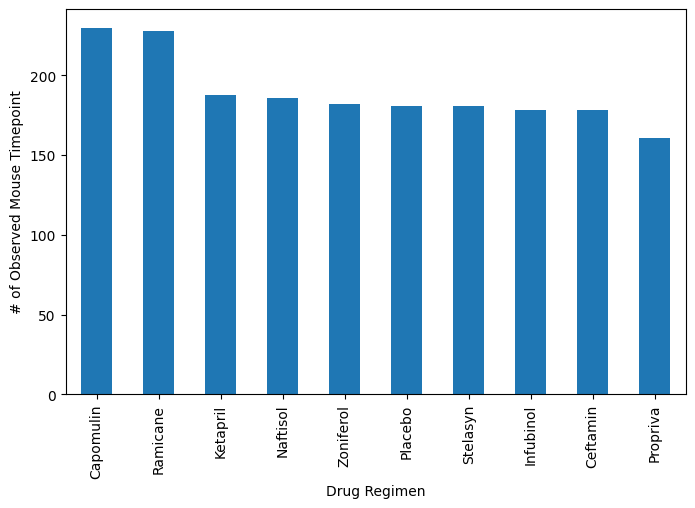

In [133]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#bar_count = data_comb.groupby(['Drug Regimen']).count()['Mouse ID']
bar_count = data_comb['Drug Regimen'].value_counts()
bar_count.plot(kind="bar", figsize=(8,5))
plt.ylabel("# of Observed Mouse Timepoint")

plt.show

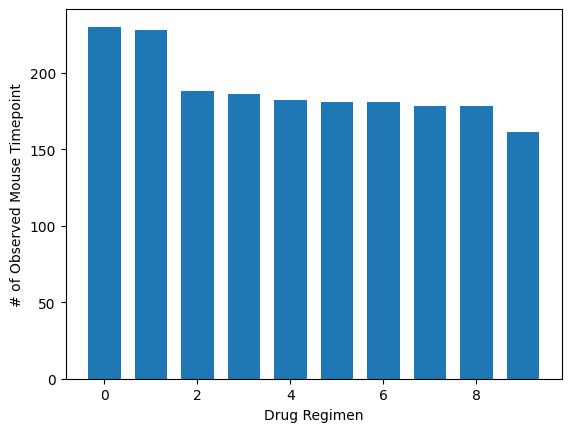

In [134]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(bar_count))
plt.bar(x_axis,bar_count,width= 0.70)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoint")
plt.show()

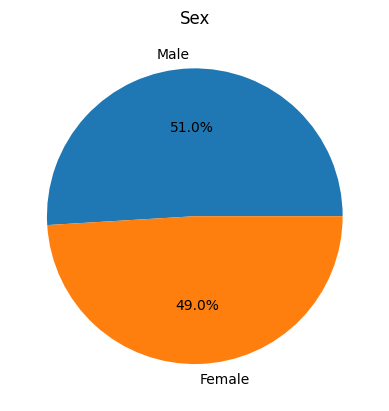

In [135]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_df['Sex'].value_counts()
bar_sex = sex_count.plot.pie(autopct="%1.1f%%", startangle=0, title='Sex')
bar_sex.set_ylabel('')
plt.show()


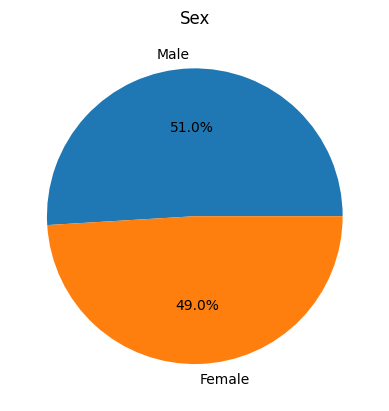

In [136]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count, labels=sex_count.index.values, autopct="%1.1f%%", startangle=0)
plt.title('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [186]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_df.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_clean = pd.merge(clean_df, greatest_timepoint, on="Mouse ID")
merged_clean = merged_clean.rename(columns={'Timepoint_y': 'Greatest Timepoint', 'Timepoint_x':'Timepoint'})
merged_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Greatest Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [190]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values = []

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

for drug in drugs_names:
    temp_df = merged_clean.loc[merged_clean['Drug Regimen'] == drug]
    final_volume = temp_df.loc[temp_df['Timepoint'] == temp_df['Greatest Timepoint']]
    values = final_volume['Tumor Volume (mm3)']
    drug_values.append(values)

    tumor_volume_data = []
    gt_df = merged_clean[merged_clean['Drug Regimen'] == drug]
    tumor_volume_data.extend(gt_df["Tumor Volume (mm3)"])
    tumor_volume_series = pd.Series(tumor_volume_data)


 #Calculate the IQR and quantitatively determine if there are any potential outliers. 
    lowerq = tumor_volume_series.quantile(0.25)
    upperq = tumor_volume_series.quantile(0.75)
    iqr = upperq-lowerq
    

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)


#Determine outliers using upper and lower bounds
    outliers = tumor_volume_series.loc[(tumor_volume_series < lower_bound) | (tumor_volume_series > upper_bound)]

    print(f"{drug}'s potential outliers: {outliers}")
 

Capomulin's potential outliers: 8    25.472143
9    23.343598
dtype: float64
Ramicane's potential outliers: 9    22.050126
dtype: float64
Infubinol's potential outliers: Series([], dtype: float64)
Ceftamin's potential outliers: Series([], dtype: float64)


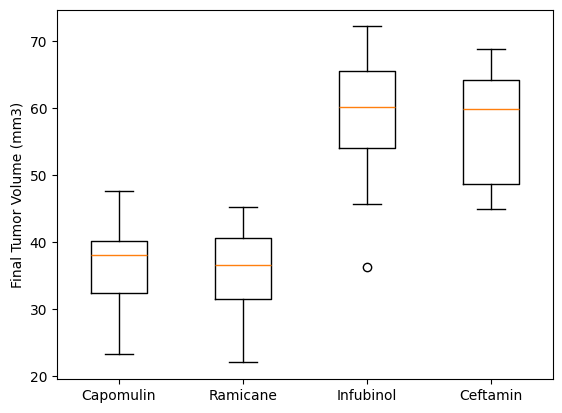

In [191]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(drug_values, labels=drugs_names)

plt.show()

## Line and Scatter Plots

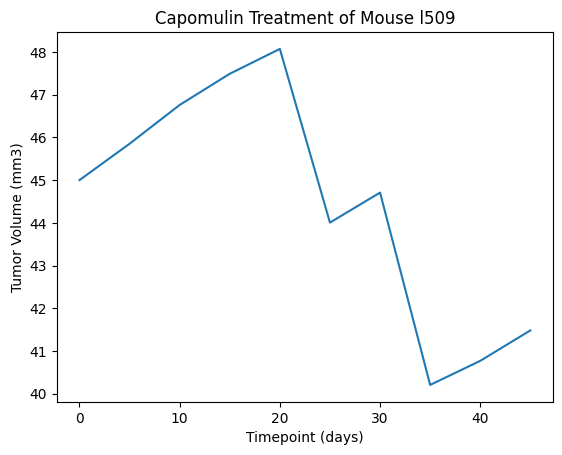

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_j235 = data_comb.loc[data_comb['Mouse ID'] == 'l509']
plt.plot(mouse_j235['Timepoint'], mouse_j235['Tumor Volume (mm3)'], marker = ' ')
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()


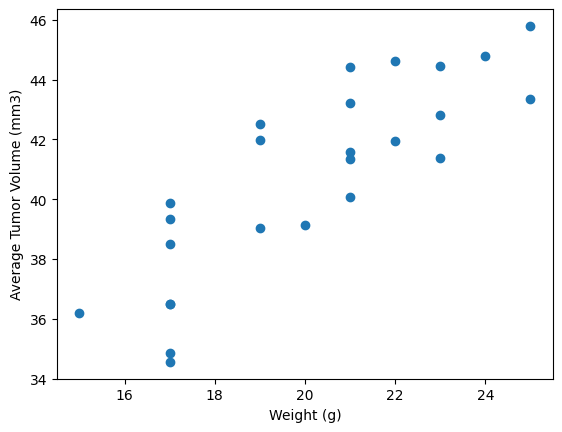

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_reg = data_comb.loc[data_comb['Drug Regimen'] == 'Capomulin']
average_tumor = capomulin_reg.groupby(['Mouse ID'])[['Tumor Volume (mm3)','Weight (g)']].mean()
                       
plt.scatter(average_tumor['Weight (g)'], average_tumor['Tumor Volume (mm3)'], marker='o')                          
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()



## Correlation and Regression

Correlation Coefficient: 0.842


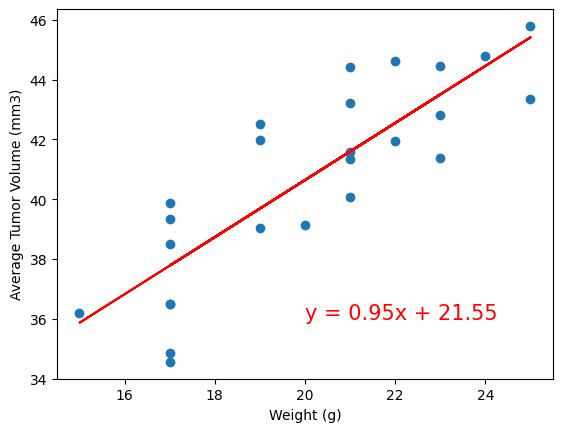

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
correlation, _ = st.pearsonr(average_tumor['Weight (g)'], average_tumor['Tumor Volume (mm3)'])  
print(f'Correlation Coefficient: {round(correlation,3)}')


# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x = (average_tumor['Weight (g)'])
y = (average_tumor['Tumor Volume (mm3)'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x , y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()